

The best model is chosen to be XGB Classifier after Data Sampling (OverSampling).
It gives the following results:

Best parameters: 

{'model__alpha': 0.001, 'model__class_weight': 'balanced', 'model__colsample_bytree': 0.2, 'model__eta': 0.039, 'model__learning_rate': 0.09, 'model__max_depth': 5, 'model__min_child_weight': 3, 'model__n_estimators': 100, 'model__objective': 'binary:logistic', 'model__subsample': 0.9, 'model__tree_method': 'exact', 'smote__k_neighbors': 9}

Best Mean cross-validation score: 0.82

Train score is 0.9075907590759075

Test score is 0.8503401360544218


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data =  pd.read_csv("train_3.csv")
test= pd.read_csv("test_3.csv")

In [3]:
test

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,83172,-2.033519,-1.079309,1.972553,-1.377534,-0.773444,0.702919,-0.870868,1.082417,-0.789931,...,0.536853,0.300559,0.409305,0.119931,-0.295053,0.331692,-0.277494,0.184017,-0.076897,141.01
1,140094,1.125524,0.189854,1.508660,2.719937,-0.882342,0.128390,-0.622651,0.219444,0.255370,...,-0.225172,-0.097584,-0.172683,0.057556,0.360859,0.265443,-0.040417,0.036686,0.033685,0.00
2,116283,-0.578027,1.109673,1.231751,0.725871,0.139675,-0.030415,0.770472,0.072078,-0.793572,...,0.097561,0.214610,0.773072,-0.110802,0.248029,-0.326140,-0.330373,0.321788,0.198050,43.25
3,222830,1.914017,0.588986,-1.481645,3.515009,1.271977,0.502868,0.536994,-0.055564,-1.452582,...,-0.179258,0.010252,0.020996,0.026001,0.186830,0.288364,-0.004518,-0.073108,-0.063333,30.67
4,60185,1.267642,0.725939,-0.091806,2.370915,0.420349,-0.570252,0.534720,-0.235391,-0.977075,...,-0.172138,-0.052174,-0.176550,-0.161225,-0.123870,0.787280,0.100856,-0.041856,0.004038,1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24841,248650,2.066791,-0.032677,-1.821182,0.494477,0.485546,-0.881016,0.477454,-0.351137,0.376171,...,-0.190975,-0.033625,0.035353,0.077397,0.708468,0.240362,0.349569,-0.092412,-0.065560,21.87
24842,254119,-0.335919,0.856781,-1.250188,-1.824806,0.047590,-0.496408,-0.145478,0.491390,-1.719179,...,NaN,0.661432,1.668454,-0.098150,0.135267,-0.709367,-0.061905,-0.128741,0.123834,15.00
24843,202157,-1.153589,1.065472,-0.038206,-3.337269,-0.118389,-1.720189,1.186937,0.029614,0.846314,...,-0.312538,-0.171561,-0.572103,-0.114665,0.013846,0.168233,-0.707049,-0.064130,0.096174,46.98
24844,173217,2.038340,0.158174,-1.635071,0.793030,0.099752,-1.246662,0.117195,-0.310331,0.767133,...,-0.167450,-0.029438,0.263983,0.037202,-0.011687,0.103687,0.635203,-0.037404,-0.029832,1.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 31 columns):
Id        24846 non-null int64
V1        22459 non-null float64
V2        24846 non-null float64
V3        24846 non-null float64
V4        24846 non-null float64
V5        24846 non-null float64
V6        24846 non-null float64
V7        24846 non-null float64
V8        24846 non-null float64
V9        24846 non-null float64
V10       24846 non-null float64
V11       24846 non-null float64
V12       24846 non-null float64
V13       24846 non-null float64
V14       24846 non-null float64
V15       24846 non-null float64
V16       24846 non-null float64
V17       24846 non-null float64
V18       24846 non-null float64
V19       24846 non-null float64
V20       22317 non-null float64
V21       24846 non-null float64
V22       24846 non-null float64
V23       24846 non-null float64
V24       24846 non-null float64
V25       24846 non-null float64
V26       24846 non-null float64
V2

In [5]:
data.columns


Index(['Id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'Target'],
      dtype='object')

This dataset didn't have any missing values.So I introdued missing values into the data 

In [6]:
data.describe()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
count,24846.000000,22459.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,...,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000
mean,141868.788095,-0.042032,0.019074,-0.055260,0.029289,-0.031085,-0.008175,-0.026007,0.014152,-0.017939,...,0.004708,0.006116,-0.004320,-0.005632,0.003193,0.001730,0.003160,-0.000100,91.698618,0.009820
std,82016.035976,2.061469,1.722647,1.730072,1.482053,1.616062,1.413044,1.620777,1.236557,1.140772,...,0.753043,0.728869,0.622440,0.602507,0.518214,0.483415,0.455299,0.314326,310.349300,0.098613
min,32.000000,-37.054295,-39.818310,-48.325589,-5.231828,-113.743307,-19.996349,-37.060311,-39.688571,-11.126624,...,-21.620120,-8.887017,-23.222016,-2.759942,-4.930750,-1.658162,-7.976100,-15.430084,0.000000,0.000000
25%,70705.000000,-0.941997,-0.611444,-0.918977,-0.853705,-0.705745,-0.778707,-0.565469,-0.207270,-0.659425,...,-0.225318,-0.528751,-0.163086,-0.363609,-0.310198,-0.325839,-0.069698,-0.053829,5.470000,0.000000
50%,141887.000000,0.002750,0.068992,0.163070,-0.006193,-0.070299,-0.279575,0.032157,0.026507,-0.056063,...,-0.026834,0.016988,-0.011396,0.036837,0.020346,-0.049872,0.001493,0.010855,21.990000,0.000000
75%,212513.500000,1.309469,0.825253,1.016704,0.759149,0.598372,0.402585,0.569205,0.335042,0.586035,...,0.192690,0.533115,0.147343,0.433292,0.352613,0.241366,0.093725,0.079364,77.900000,0.000000
max,284781.000000,2.418267,19.167239,3.862590,15.304184,28.762671,73.301626,120.589494,19.587773,8.918202,...,27.202839,8.272233,17.606637,4.584549,4.554683,3.415636,31.612198,15.522649,25691.160000,1.000000


# TYPES OF VARIABLES:

In [5]:
data.isnull().sum()

Id           0
V1        2387
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20       2529
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
V29          0
Target       0
dtype: int64

In [7]:
data.columns

Index(['Id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'Target'],
      dtype='object')

In [8]:
categorical=[i for i in data.columns if data[i].dtypes=='O' and i not in temporal]
len(categorical)

0

In [9]:
discrete=[i for i in data.columns if data[i].dtypes=='int64' ]
discrete

['Id', 'Target']

In [10]:
continuous=[i for i in data.columns if data[i].dtypes=='float64']
len(continuous)

29

In [11]:
for var in continuous:
    if '?' in data[var]:
        print ('{}-True'.format(var))
    else: 
        print('False')

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


# VARIABLE DISTRIBUTIONS:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7035DFEC8>,
      dtype=object)

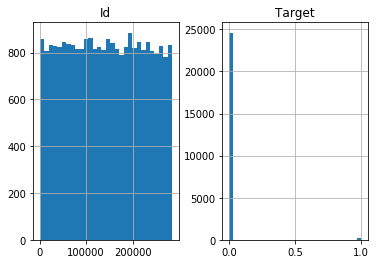

In [12]:
data[discrete[:]].hist(bins=30)

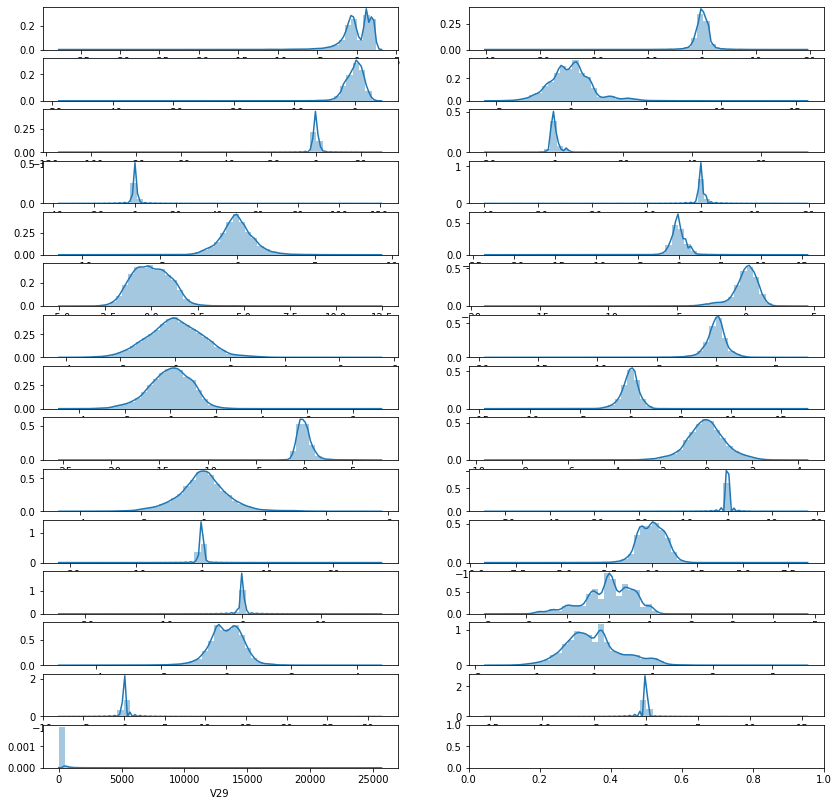

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=15,figsize=(14,14))
axs = axs.flatten() 

for i, var in enumerate(continuous):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

# CORRELATIONS:

In [13]:
cor=data.corr()
cor

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
Id,1.000000,0.113209,-0.018078,-0.344400,-0.118087,0.146777,-0.055269,0.072930,-0.045762,0.011950,...,0.034326,0.134566,0.051062,-0.012996,-0.215736,-0.040277,-0.009830,-0.013870,-0.006512,-0.028446
V1,0.113209,1.000000,-0.056748,0.153798,-0.081292,0.138548,-0.023652,0.044414,-0.003346,0.048714,...,0.010530,0.003879,0.062343,-0.004829,0.010875,-0.000272,-0.029906,0.027766,-0.262588,-0.195578
V2,-0.018078,-0.056748,1.000000,-0.071895,0.061846,0.014892,-0.082690,-0.174932,0.039876,-0.039797,...,-0.001476,0.017668,0.093986,-0.002840,0.023821,0.000962,-0.037753,0.026125,-0.528025,0.185381
V3,-0.344400,0.153798,-0.071895,1.000000,-0.131803,0.197305,-0.019094,0.093494,-0.009439,0.099843,...,0.016669,-0.015475,0.015989,-0.004218,-0.002760,-0.008184,-0.082967,0.046468,-0.257823,-0.358543
V4,-0.118087,-0.081292,0.061846,-0.131803,1.000000,-0.093773,-0.012474,-0.073659,0.007605,-0.077898,...,0.006510,0.005548,-0.036205,-0.004004,-0.005283,0.008077,0.027365,0.007514,0.121432,0.295945
V5,0.146777,0.138548,0.014892,0.197305,-0.093773,1.000000,-0.119833,-0.106402,0.025743,0.061003,...,0.080997,-0.025973,-0.043950,-0.015882,-0.037024,-0.026433,-0.168281,0.112120,-0.506480,-0.156473
V6,-0.055269,-0.023652,-0.082690,-0.019094,-0.012474,-0.119833,1.000000,0.185972,-0.056737,0.006906,...,-0.057815,0.010404,0.030721,0.021134,0.018562,0.009600,0.107747,-0.100770,0.332966,-0.098290
V7,0.072930,0.044414,-0.174932,0.093494,-0.073659,-0.106402,0.185972,1.000000,-0.083091,0.085859,...,-0.078756,0.015144,0.026183,0.019930,0.037561,0.013978,0.183282,-0.137196,0.509496,-0.297257
V8,-0.045762,-0.003346,0.039876,-0.009439,0.007605,0.025743,-0.056737,-0.083091,1.000000,-0.014587,...,-0.010813,-0.003699,-0.007909,0.000388,0.011632,0.002853,-0.000189,0.054152,-0.149102,0.033173
V9,0.011950,0.048714,-0.039797,0.099843,-0.077898,0.061003,0.006906,0.085859,-0.014587,1.000000,...,0.001997,-0.001710,-0.017323,0.006910,-0.004933,-0.012316,-0.015759,-0.014227,-0.049814,-0.209813


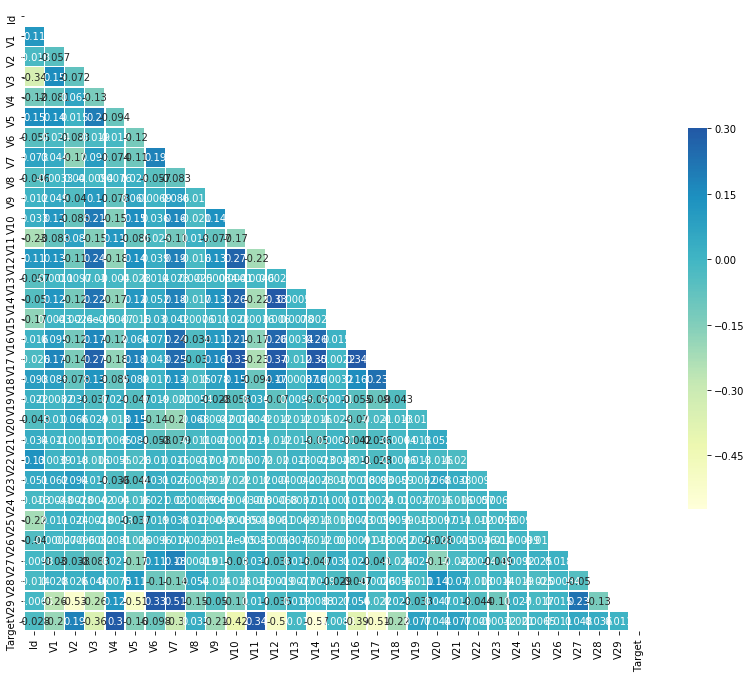

In [14]:
mask = np.triu(np.ones_like(cor, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,14))


# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap='YlGnBu', vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

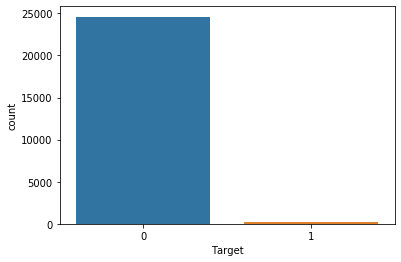

In [15]:
sns.countplot(data['Target'])

# MISSING VALUES :


In [16]:
data.isnull().any()

Id        False
V1         True
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20        True
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
V29       False
Target    False
dtype: bool

In [17]:
data.isnull().sum()

Id           0
V1        2387
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20       2529
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
V29          0
Target       0
dtype: int64

In [18]:
for i in data.columns:
    print("{}:{}".format(i,data[i].isnull().sum()))

Id:0
V1:2387
V2:0
V3:0
V4:0
V5:0
V6:0
V7:0
V8:0
V9:0
V10:0
V11:0
V12:0
V13:0
V14:0
V15:0
V16:0
V17:0
V18:0
V19:0
V20:2529
V21:0
V22:0
V23:0
V24:0
V25:0
V26:0
V27:0
V28:0
V29:0
Target:0


In [19]:
for i in data.columns:
    print("{}:{}".format(i,data[i].isnull().mean()))

Id:0.0
V1:0.09607180230218144
V2:0.0
V3:0.0
V4:0.0
V5:0.0
V6:0.0
V7:0.0
V8:0.0
V9:0.0
V10:0.0
V11:0.0
V12:0.0
V13:0.0
V14:0.0
V15:0.0
V16:0.0
V17:0.0
V18:0.0
V19:0.0
V20:0.10178700796908959
V21:0.0
V22:0.0
V23:0.0
V24:0.0
V25:0.0
V26:0.0
V27:0.0
V28:0.0
V29:0.0
Target:0.0


# OUTLIERS DETECTION:

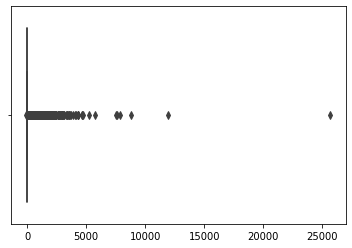

In [20]:

sns.boxplot(data[data[discrete].notnull()][discrete]);

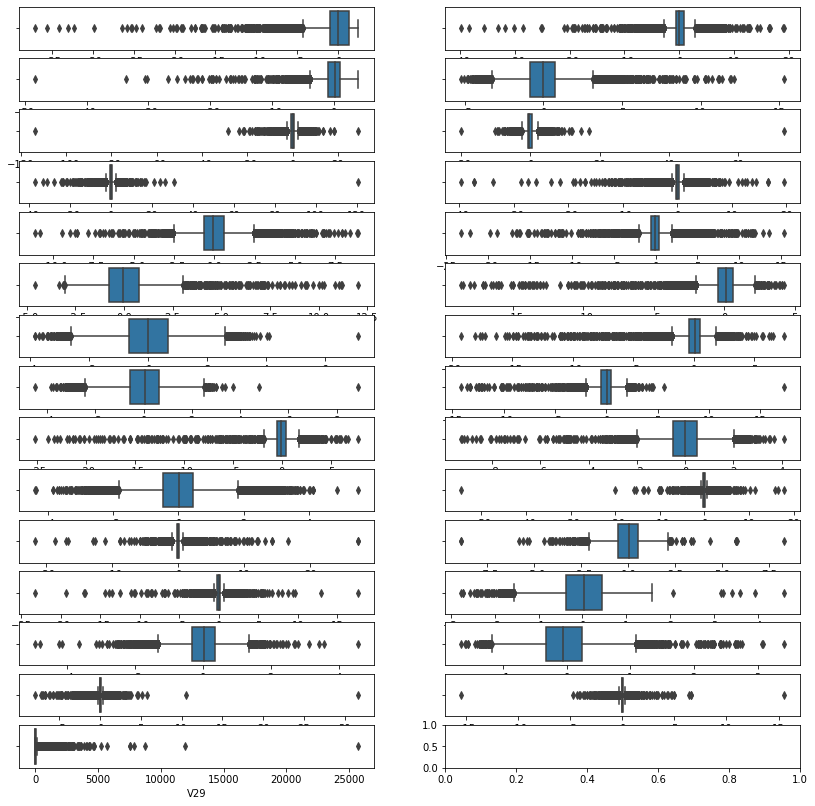

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=15,figsize=(14,14))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');

# MISSING VALUES VISUALIZATION:


In [22]:
data.columns

Index(['Id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'Target'],
      dtype='object')

In [23]:
import missingno as msno

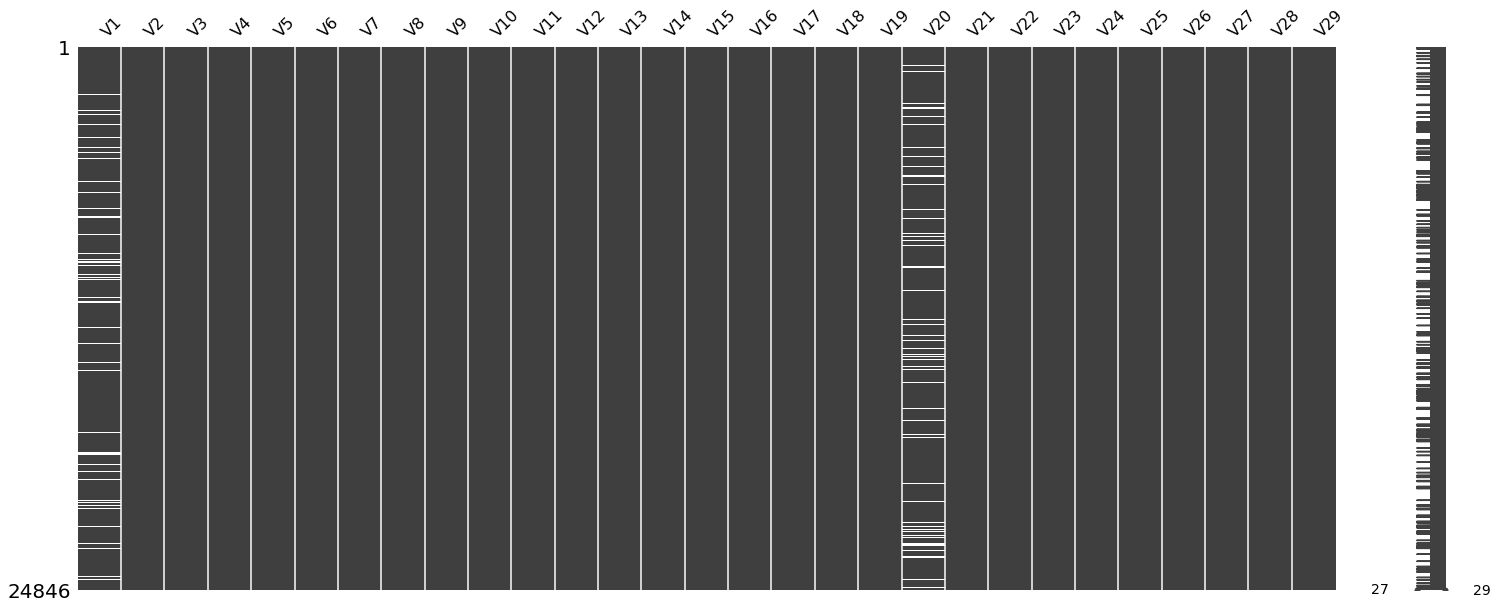

In [24]:
msno.matrix(data[continuous])

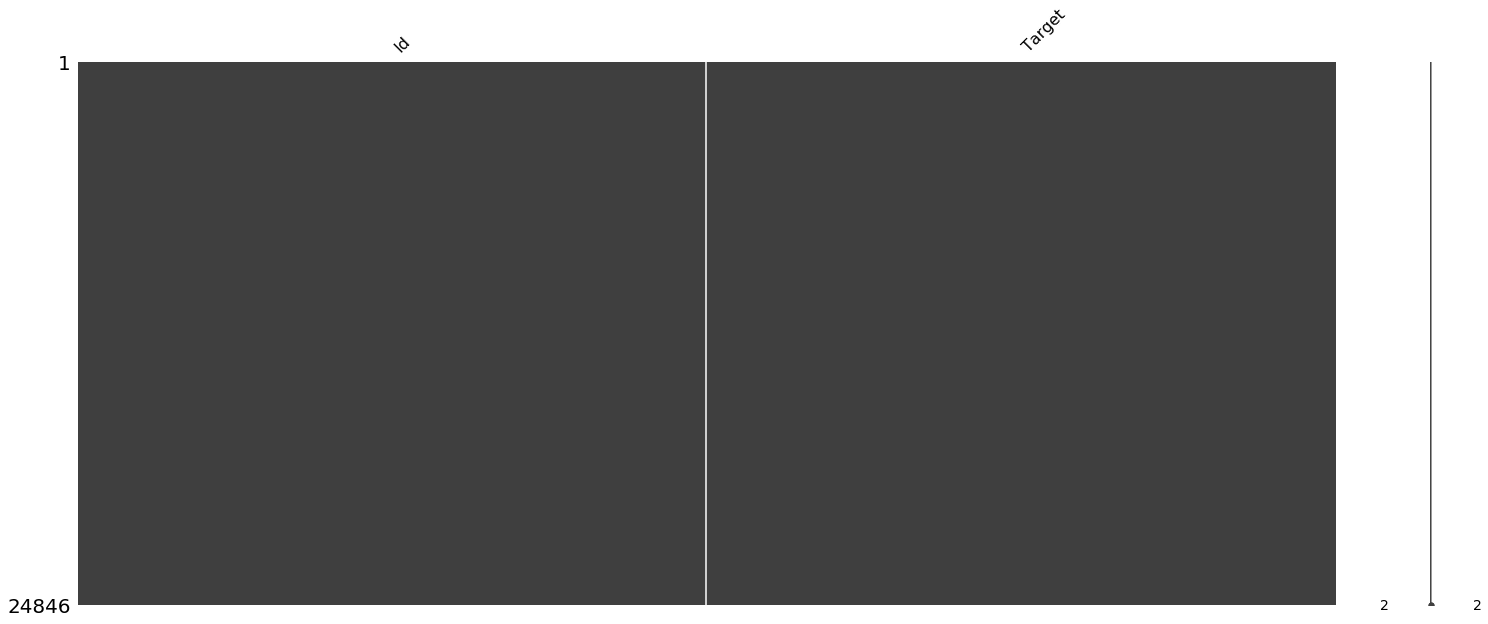

In [25]:
msno.matrix(data[discrete])

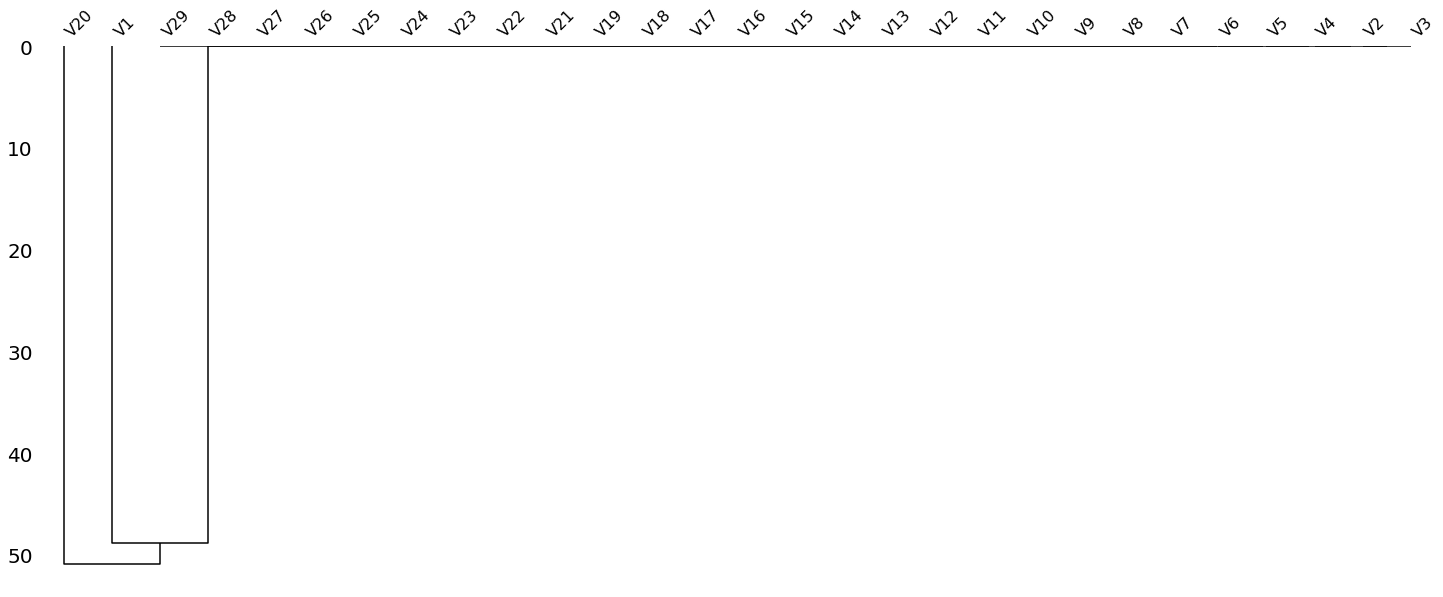

In [26]:
msno.dendrogram(data[continuous])

# STRATIFIED SAMPLING:

There are totally around 25,000 observations.I did stratified sampling to run the model faster.I decided to take 50% of the data as this gave a proper  representation of the total dataset


In [14]:

def __sample_size(population, size):
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

In [15]:
def stratified_sample(data, strata, size=0.4, seed=None, keep_index= True):
    population = len(data)
    size = __sample_size(population, size)
    tmp = data[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    first = True
    for i in range(len(tmp_grpd)):
           
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']
            if type(value) == str:
                value = "'" + str(value) + "'"

            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
                
        if first:
            stratified_data = data.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = data.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_data = stratified_data.append(tmp_df, ignore_index=True)

    return stratified_data

In [16]:
data_temp=stratified_sample(data, strata=['Target'], size=0.5, seed=0, keep_index=False)

C:\Users\14695\AppData\Local\Continuum\anaconda3\envs\buan6341_2020\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# SPLITTING DATA INTO TRAIN AND TEST DATA SETS

In [17]:
data_temp.drop('Id',axis=1,inplace=True)
data.drop('Id',axis=1,inplace=True)

In [18]:

data['Target'].value_counts(1)


0    0.99018
1    0.00982
Name: Target, dtype: float64

In [19]:
X=data_temp.drop('Target',axis=1)
y=data_temp['Target']
# X=data.drop('Target',axis=1)
# y=data['Target']


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [21]:
X_train.shape

(7453, 29)

In [22]:
y_train.shape

(7453,)

In [23]:
y_train.dtypes

dtype('int64')

In [24]:
data['Target'].isnull().any()

False

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 8784 to 7270
Data columns (total 29 columns):
V1     6768 non-null float64
V2     7453 non-null float64
V3     7453 non-null float64
V4     7453 non-null float64
V5     7453 non-null float64
V6     7453 non-null float64
V7     7453 non-null float64
V8     7453 non-null float64
V9     7453 non-null float64
V10    7453 non-null float64
V11    7453 non-null float64
V12    7453 non-null float64
V13    7453 non-null float64
V14    7453 non-null float64
V15    7453 non-null float64
V16    7453 non-null float64
V17    7453 non-null float64
V18    7453 non-null float64
V19    7453 non-null float64
V20    6686 non-null float64
V21    7453 non-null float64
V22    7453 non-null float64
V23    7453 non-null float64
V24    7453 non-null float64
V25    7453 non-null float64
V26    7453 non-null float64
V27    7453 non-null float64
V28    7453 non-null float64
V29    7453 non-null float64
dtypes: float64(29)
memory usage: 1.7 MB


In [26]:
for i in X_train.columns:
    if X_train[i].isnull().any():
               print(i)


V1
V20


In [27]:
X_train.isnull().any()

V1      True
V2     False
V3     False
V4     False
V5     False
V6     False
V7     False
V8     False
V9     False
V10    False
V11    False
V12    False
V13    False
V14    False
V15    False
V16    False
V17    False
V18    False
V19    False
V20     True
V21    False
V22    False
V23    False
V24    False
V25    False
V26    False
V27    False
V28    False
V29    False
dtype: bool

In [28]:
y_train.isnull().any()

False

In [29]:
y_train.head()

8784    0
9604    0
2583    0
5123    0
2770    0
Name: Target, dtype: int64

# EDA PIPELINE:

Exploratory Data Analysis is done.It is found that there are a lot of outliers in this dataset.Hence handling outliers is crucial.The columns V1 and V2o has missing values.Due to the presence of outliers, The missing values are imputed using the median value. Some features are skewed eg.  column V29 .So, Variable Transformation is done using YeoJohnson transformer as it can handle the negative values as well. Finally,the data is scaled using Robust Scaler.

In [30]:
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import MaxAbsScaler,RobustScaler
from feature_engine import variable_transformers as vt
from sklearn.preprocessing import RobustScaler
from feature_engine.variable_transformers import ReciprocalTransformer as rt
from feature_engine.missing_data_imputers import RandomSampleImputer
from feature_engine import outlier_removers as outr
from sklearn.impute import KNNImputer

from feature_engine import outlier_removers as outr
from feature_engine.outlier_removers import Winsorizer
from feature_engine.outlier_removers import ArbitraryOutlierCapper
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import fbeta_score, make_scorer

f2_score = make_scorer(fbeta_score, beta=2)

In [31]:
patent_preprocess = Pipeline([
    
    #('imputer', mdi.CategoricalVariableImputer(variables=['collision_type','police_report_available','property_damage'])),
   #('imputer', mdi.RandomSampleImputer(random_state=cat,seed='observation')),
     ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                         variables=['V1','V20'])),
  #  ('imputer_num', KNNImputer(n_neighbors=)),
#    (' tail_imputer' , mdi.EndTailImputer(distribution='gaussian',
#                           tail='right',
#                           fold=3,
#                           variables=['V1', 'V20'])),

   
#     ('disc' , dsc.EqualWidthDiscretiser(bins=7, variables=)),
    ('capper',    outr.Winsorizer(distribution='gaussian', tail='both', fold=1.5, variables=continuous)),
    
   
#     ('discr', dsc.DecisionTreeDiscretiser(cv=5,
#                               scoring=f2_score,
#                               variables=continuous,
#                               param_grid=({'max_depth':range(1,10)}), 
#                               regression=False)),
    #('yjt',vt.PowerTransformer(variables=['V29'], exp=0.5)),
   ('yjt', vt.YeoJohnsonTransformer(variables =continuous)),
    
   ('discretisation', dsc.EqualWidthDiscretiser(bins=11, variables=continuous)),
   # ('scaler_mean' , StandardScaler(with_mean=False, with_std=False)),

    ('scaler',RobustScaler()),

#     ('scaler_mean',RobustScaler(with_centering=False,
#                              with_scaling=True,
#                              quantile_range=(0, 50))),

     
])

In [32]:
patent_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['V1', 'V20'])),
                ('capper',
                 Winsorizer(distribution='gaussian', fold=1.5, tail='both',
                            variables=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                       'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                       'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                       'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                       'V26', 'V27', 'V28', '...
                ('discretisation',
                 EqualWidthDiscretiser(bins=11, return_object=False,
                                       variables=['V1', 'V2', 'V3', 'V4', 'V5',
                                                  'V6', 'V7', 'V8', 'V9', 'V10',
                                                  'V11', 'V12', 'V

In [33]:
# Apply Transformations
X_train=patent_preprocess.transform(X_train)
X_test=patent_preprocess.transform(X_test)

In [34]:
test1=test.drop('Id',axis=1)
test1=patent_preprocess.transform(test1)


# NAIVE ALGORITHMS

In [35]:
from sklearn.metrics import classification_report

## DUMMY CLASSIFIER

In [36]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, make_scorer
model_dummy = DummyClassifier(random_state=123)
model_dummy.fit(X_train,y_train)
from sklearn.metrics import fbeta_score, make_scorer

f2_score = make_scorer(fbeta_score, beta=2)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring=f2_score)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Test Performance: ", model_dummy.score(X_train,y_train))



Mean Cross-validation scores: 0.0

Naive Algorithm Test Performance:  0.9852408426137126


## LOGISTIC REGRESSION

In [51]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, make_scorer

f2_score = make_scorer(fbeta_score, beta=2)
# f2_score
# make_scorer(fbeta_score, beta=5)

scale=StandardScaler()
clf=scale.fit(X_train,y_train)
clf = LogisticRegression()

cv_scores = cross_val_score(clf, X_train, y_train,cv=5,scoring=f2_score)
c_space = np.logspace(-3,3,10)
pen=['l1','l2']
param_grid = {'C': c_space,'penalty':pen,'solver':['liblinear','lbfgs','saga']}


print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print("Number of Iterations:{}".format(len(cv_scores)))
print("Mean Accuracy:{}".format(cv_scores.mean()))

clf_cv=GridSearchCV(clf,param_grid,cv=7,scoring=f2_score)
clf_cv=clf_cv.fit(X_train,y_train)


print("Logistic Performance-train: ", clf_cv.score(X_train,y_train))
print("Logistic Performance-test: ", clf_cv.score(X_test,y_test))
# y_pred=clf_cv.predict(X_test)



Mean Cross-validation scores: 0.7944422675026124
Number of Iterations:5
Mean Accuracy:0.7944422675026124
Logistic Performance-train:  0.8135593220338984
Logistic Performance-test:  0.821917808219178


## K NEIGHBORS CLASSIFIER 

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


param_knn = {'n_neighbors': range(1,10),'n_jobs':[-1]}


grid_knn = GridSearchCV(knn, param_knn, cv=7, return_train_score=True,scoring =f2_score)
grid_knn.fit(X_train, y_train)


print("Best Mean Cross-validation score: {:.4f}".format(grid_knn.best_score_))
print()

print('KNN parameters: ', grid_knn.best_params_)


print("KNN Test Performance-train: ", grid_knn.score(X_train,y_train))
print("KNN Test Performance-test: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.6845

KNN parameters:  {'n_jobs': -1, 'n_neighbors': 1}
KNN Test Performance-train:  1.0
KNN Test Performance-test:  0.8053691275167786


## DECISION TREE CLASSIFIER

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(random_state=42)


param_dtree = {'max_depth': range(1,15),'max_leaf_nodes':range(2,10)}


grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True,scoring =f2_score)
grid_dtree.fit(X_train, y_train)


print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()


print('Decision Tree parameters: ', grid_dtree.best_params_)
y_pred=grid_dtree.predict(X_test)


print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))
print("Decision Tree  Test Performance: ", grid_dtree.score(X_test,y_test))
#print(classification_report(y_test,y_pred))

Best Mean Cross-validation score: 0.75

Decision Tree parameters:  {'max_depth': 3, 'max_leaf_nodes': 6}
Decision Tree Train Performance:  0.7560137457044674
Decision Tree  Test Performance:  0.704225352112676


## SUPPORT VECTOR CLASSIFIER

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#define a list of parameters

param_grid_rbf= [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
               'gamma': [0.001, 0.01, 0.1, 1]}]
param_grid_linear=[{'kernel': ['linear'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
              
param_grid_sig=[{'kernel': ['sigmoid'],'gamma': np.logspace(-3,2,10)}]

param_grid_poly=[{'kernel':['poly'],
               #'C':[0.001,0.01,0.1,0.25,0.5,1,10],
               'degree':[1,2,3]}]
               #'gamma':[0.1,1,2,5,10,50]}]
    
c=[0.001, 0.01, 0.1, 1, 10, 100]
param_LinearSVC=[{'C': c }]



## RBF KERNEL

In [42]:
grid_search = GridSearchCV(SVC(), param_grid_rbf, cv=3,
                          return_train_score=True,scoring = f2_score)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
#print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.8249158249158249
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.82


## SIGMOID KERNEL

In [43]:
grid_search = GridSearchCV(SVC(),param_grid_sig, cv=10,
                          return_train_score=True,scoring = f2_score)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


train score:  0.7993197278911564
test score:  0.821917808219178
Best parameters: {'gamma': 0.01291549665014884, 'kernel': 'sigmoid'}
Best cross-validation score: 0.79


## POLYNOMIAL KERNEL

In [44]:
grid_search = GridSearchCV(SVC(), param_grid_poly, cv=3,
                          return_train_score=True,scoring = f2_score)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.8249158249158249
test score:  0.821917808219178
Best parameters: {'degree': 1, 'kernel': 'poly'}
Best cross-validation score: 0.82


## LINEAR SUPPORT VECTOR CLASSIFIER

In [46]:
from sklearn.svm import LinearSVC
grid_search = GridSearchCV(LinearSVC(), param_LinearSVC, cv=3,
                          return_train_score=True,scoring = f2_score)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.8249158249158249
test score:  0.8361774744027304
Best parameters: {'C': 1}
Best cross-validation score: 0.82


## RANDOM FOREST CLASSIFIER


In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [100,200,300,400,500],
    #'max_features': ['auto'],
    'max_depth' :range(1,10),
    #'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,scoring =f2_score)
rfc_grid.fit(X_train,y_train)
X_train_rfc = rfc_grid.predict(X_train)
X_test_rfc = rfc_grid.predict(X_test)


print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

#print(rfc_grid.score(X_test,y_test))

Best Mean Cross Validation Score is 0.808965699777475
Best Mean Cross Validation Score is {'max_depth': 6, 'n_estimators': 100}
Train score is 0.8305084745762711
Test score is 0.821917808219178


In [60]:
param_grid = {"max_depth": [3,5],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy' )
rfc_grid = GridSearchCV(model,param_grid,cv=5, return_train_score=True,scoring =f2_score)
rfc_grid.fit(X_train,y_train)
X_train_rfc = rfc_grid.predict(X_train)
X_test_rfc = rfc_grid.predict(X_test)


print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.81053038136615
Best Mean Cross Validation Score is {'max_depth': 5, 'max_features': 5, 'n_estimators': 10}
Train score is 0.8277027027027027
Test score is 0.7931034482758621


## EXTRA TREES CLASSIFIER

In [61]:
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [300],
    'max_features': ['auto'],
    'max_depth' :[14],
    #'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring =f2_score)
etc_grid.fit(X_train,y_train)
X_train_etc = etc_grid.predict(X_train)
X_test_etc = etc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7630782204735891
Best Mean Cross Validation Score is {'max_depth': 14, 'max_features': 'auto', 'n_estimators': 300}
Train score is 1.0
Test score is 0.8075601374570447


## GRADIENT BOOSTING

In [62]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [4],
              'n_estimators' :[200],
              'learning_rate' : [0.09],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring =f2_score)
gbc_grid.fit(X_train,y_train)
X_train_gbc = gbc_grid.predict(X_train)
X_test_gbc = gbc_grid.predict(X_test)


print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Paramaters are {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.7581411184156325
Best Paramaters are {'learning_rate': 0.09, 'max_depth': 4, 'n_estimators': 200}
Train score is 1.0
Test score is 0.8333333333333335


## XGB CLASSIFIER

In [63]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=1,early_stopping_rounds=5,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' :[8],
              'n_estimators' :[200],
              'learning_rate' :[0.2],
               'min_child_weight' : [5],
               'subsample':[1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring =f2_score)
xgbc_grid.fit(X_train,y_train)
X_train_xgbc = xgbc_grid.predict(X_train)
X_test_xgbc = xgbc_grid.predict(X_test)


print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.7645166055452437
Best Mean Cross Validation Score is {'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1}
Train score is 0.8528428093645486
Test score is 0.8047945205479452


In [64]:
classifiers={'knn':grid_knn ,
             'dtree':grid_dtree,
             #'svm':grid_search,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [ ]:
classifiers.keys()

In [ ]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

## STACKING CLASSIFIER USING NAIVE MODELS:

In [ ]:
from sklearn.ensemble import StackingClassifier

In [148]:
 sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                                ('rfc', rfc_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_),
                               ('etc_grid',etc_grid.best_estimator_),
                               #('dtree', grid_dtree.best_estimator_)
                              ], final_estimator=DecisionTreeClassifier())
sclf1_param = {
#             'final_estimator__criterion' : ["gini", "entropy"],
#               'final_estimator__splitter' :   ["best", "random"],
                 'final_estimator__max_depth' : range(1,10),

              }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9977192911383288
Best Mean Cross Validation Score is {'final_estimator__max_depth': 2}
Train score is 0.9985240842613713
Test score is 0.9969818913480886


In [114]:
 sclf2 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                                #('rfc', rfc_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_),
                               #('etc_grid',etc_grid.best_estimator_),
                               #('dtree', grid_dtree.best_estimator_)
                              ], final_estimator=DecisionTreeClassifier())
sclf2_param = {
#             'final_estimator__criterion' : ["gini", "entropy"],
#               'final_estimator__splitter' :   ["best", "random"],
                 'final_estimator__max_depth' :[2],

              }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9971826484634878
Best Mean Cross Validation Score is {'final_estimator__max_depth': 2}
Train score is 0.9994633033677713
Test score is 0.9981891348088531


# Cost Sensitive Algorithms:

## LOGISTIC REGRESSION

In [65]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:100,1:10},{0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, n_jobs=-1, scoring=f2_score)
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))
print(f'Train score is {cgrid_logreg.score(X_train,y_train)}')
print(f'Test score is {cgrid_logreg.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.81
Train score is 0.8108108108108109
Test score is 0.8361774744027304


## SUPPORT VECTOR MACHINE

In [36]:
from sklearn import svm
from sklearn.svm import SVC

In [31]:
svc = svm.SVC()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10},{0:100,1:10}, {0:1,1:100}],
     'kernel':['rbf','linear','sigmoid']
}

#apply grid search
grid_svc= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring=f2_score)
grid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svc.best_score_))
print(f'Train score is {grid_svc.score(X_train,y_train)}')
print(f'Test score is {grid_svc.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 10}, 'kernel': 'linear'}
Best Mean cross-validation score: 0.81
Train score is 0.8193979933110368
Test score is 0.8361774744027304


## DECISION TREE CLASSIFIER

In [68]:
param_grid = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:100,1:10},{0:1,1:10}, {0:1,1:100}],
}
#apply grid search
grid_dtree= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2, scoring=f2_score)
grid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(grid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print(f'Train score is {grid_dtree.score(X_train,y_train)}')
print(f'Test score is {grid_dtree.score(X_test,y_test)}')

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.73
Train score is 1.0
Test score is 0.7605177993527508


## XGB CLASSIFIER

In [69]:
from  xgboost import XGBClassifier
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight':[10],
    'max_depth' : [2],
    'n_estimators':[70],
    'learning_rate' :[0.25],
    
}

#apply grid search
grid_xgboost= GridSearchCV(xgboost, param_grid, cv=7, n_jobs=2, scoring=f2_score)
grid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost.best_score_))
print(f'Train score is {grid_xgboost.score(X_train,y_train)}')
print(f'Test score is {grid_xgboost.score(X_test,y_test)}')

Best parameters: {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 70, 'scale_pos_weight': 10}
Best Mean cross-validation score: 0.82
Train score is 0.9870550161812298
Test score is 0.8695652173913044


In [70]:
y_pred=grid_xgboost.predict(X_test)
fbeta_score(y_test,y_pred,beta=7)

0.8541392904073587

## RANDOM FOREST CLASSIFIER

In [71]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

rfc = RandomForestClassifier(n_estimators=80, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
# evaluate model
scores = cross_val_score(rfc, X_train, y_train, scoring=f2_score, cv=cv, n_jobs=-1)
# summarize performance
print('Mean F2_score: %.3f' % mean(scores))
rfc.fit(X_train,y_train)
print(f'Train score is {rfc.score(X_train,y_train)}')
print(f'Test score is {rfc.score(X_test,y_test)}')

Mean F2_score: 0.765
Train score is 1.0
Test score is 0.9967806841046277


## EXTRA TREES CLASSIFIER

In [72]:
etc= ExtraTreesClassifier(n_estimators=89, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(etc, X_train, y_train, scoring=f2_score, cv=cv, n_jobs=-1)
# summarize performance
#print('Mean f2_score: %.3f' % mean(scores))
print(f'Mean score is:{np.mean(scores)}')
etc.fit(X_train,y_train)
print(f'Train score is {etc.score(X_train,y_train)}')
print(f'Test score is {etc.score(X_test,y_test)}')

Mean score is:0.7742485685412466
Train score is 1.0
Test score is 0.9971830985915493


## BAGGING CLASSIFIER-UNDERSAMPLING

In [73]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [74]:

from imblearn.ensemble import BalancedBaggingClassifier

bag_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)

scores = cross_val_score(bag_dtree, X_train, y_train, scoring=f2_score, cv=cv, n_jobs=-1)

print('Mean f2_score: %.3f' % mean(scores))
bag_dtree.fit(X_train,y_train)
print(f'Train score is {bag_dtree.score(X_train,y_train)}')
print(f'Test score is {bag_dtree.score(X_test,y_test)}')

Mean f2_score: 0.529
Train score is 0.9602844492150812
Test score is 0.9533199195171026


# Data Sampling

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## DECISION TREE CLASSIFIER

In [77]:

pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', DecisionTreeClassifier())])
param_grid = {

    'smote__k_neighbors': range(1,10),
    'model__max_depth': range(1,10),
    'model__max_leaf_nodes':range(2,10)
}


grid_smote1= GridSearchCV(pipe_rand_smote, param_grid, cv=7, n_jobs=2, scoring=f2_score)
grid_smote1.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote1.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote1.best_score_))
print(f'Train score is {grid_smote1.score(X_train,y_train)}')
print(f'Test score is {grid_smote1.score(X_test,y_test)}')

Best parameters: {'model__max_depth': 2, 'model__max_leaf_nodes': 9, 'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.63
Train score is 0.7919254658385094
Test score is 0.8079268292682927


## K NEIGHBOURS CLASSIFIER

In [78]:
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', KNeighborsClassifier())])
param_grid = {
  
    'smote__k_neighbors':[2],
    'model__n_neighbors':[3],
}


grid_smote2= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring=f2_score)
grid_smote2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote2.best_score_))
print(f'Train score is {grid_smote2.score(X_train,y_train)}')
print(f'Test score is {grid_smote2.score(X_test,y_test)}')

Best parameters: {'model__n_neighbors': 3, 'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.71
Train score is 0.9159159159159159
Test score is 0.7680722891566265


## GRADIENT BOOSTING:

In [79]:
from  sklearn.ensemble import GradientBoostingClassifier
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', GradientBoostingClassifier(random_state=42))])
param_grid = {
  
    'smote__k_neighbors':[2],
    'model__max_depth' :[3],
    'model__n_estimators' :[200],
}


grid_smote2= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring=f2_score)
grid_smote2.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote2.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote2.best_score_))
print(f'Train score is {grid_smote2.score(X_train,y_train)}')
print(f'Test score is {grid_smote2.score(X_test,y_test)}')

Best parameters: {'model__max_depth': 3, 'model__n_estimators': 200, 'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.78
Train score is 0.983606557377049
Test score is 0.8020477815699658


## SUPPORT VECTOR CLASSIFIER
Took a really long time to run

In [49]:
# pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', SVC())])
# param_grid = {

#     'smote__k_neighbors':[1,2,3,4,5],
#     'model__kernel': ['sigmoid','rbf','linear'],
#     'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
# }


# grid_smote3= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring=f2_score)
# grid_smote3.fit(X_train, y_train)

# print("Best parameters: {}".format(grid_smote3.best_params_))
# print("Best Mean cross-validation score: {:.2f}".format(grid_smote3.best_score_))
# print(f'Train score is {grid_smote3.score(X_train,y_train)}')
# print(f'Test score is {grid_smote3.score(X_test,y_test)}')

##  LOGISTIC REGRESSION

In [81]:

pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_roc_lg1 = {'smote__k_neighbors': [1,2,3,4,5]}

grid_smote4= GridSearchCV(pipe_roc_lg,param_roc_lg1, cv=5, n_jobs=2, scoring=f2_score)
grid_smote4.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote4.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote4.best_score_))
print(f'Train score is {grid_smote4.score(X_train,y_train)}')
print(f'Test score is {grid_smote4.score(X_test,y_test)}')

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.49
Train score is 0.5212014134275619
Test score is 0.6120331950207468


## RANDOM FOREST CLASSIFIER

In [82]:
from sklearn.ensemble import RandomForestClassifier
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', RandomForestClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors':[9],

     'model__max_depth' :[1] ,
#      'model__n_estimators': [3,5,1],
#      'model__max_features': [3,5,6,7,8],
# #     'model__max_depth' : [3],
#     'model__criterion' :[ 'gini'],
    #'model__verbose':[-1]
}


grid_smote5= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring=f2_score)
grid_smote5.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote5.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote5.best_score_))
print(f'Train score is {grid_smote5.score(X_train,y_train)}')
print(f'Test score is {grid_smote5.score(X_test,y_test)}')

Best parameters: {'model__max_depth': 1, 'smote__k_neighbors': 9}
Best Mean cross-validation score: 0.74
Train score is 0.7331378299120235
Test score is 0.7871720116618075


### Using RandomizedSearchCV

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', RandomForestClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors':[9],

     'model__max_depth' :[5] ,
      'model__n_estimators': [200],
      'model__max_features':[3],
    
     'model__warm_start' : [True],
    'model__criterion' :[ 'entropy'],
    'model__class_weight':['balanced_subsample']
}


grid_smote5= RandomizedSearchCV(pipe_rand_smote, param_grid, cv=10,n_jobs=2, scoring=f2_score)
grid_smote5.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote5.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote5.best_score_))
print(f'Train score is {grid_smote5.score(X_train,y_train)}')
print(f'Test score is {grid_smote5.score(X_test,y_test)}')

Best parameters: {'smote__k_neighbors': 9, 'model__warm_start': True, 'model__n_estimators': 200, 'model__max_features': 3, 'model__max_depth': 5, 'model__criterion': 'entropy', 'model__class_weight': 'balanced_subsample'}
Best Mean cross-validation score: 0.79
Train score is 0.8757961783439491
Test score is 0.8974358974358974


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', RandomForestClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors':[9],

     'model__max_depth' :[5] ,
      'model__n_estimators': [200],
      'model__max_features':[1],
    
     'model__warm_start' : [True],
    'model__criterion' :[ 'entropy'],
   'model__class_weight':['balanced']
}


grid_smote5=GridSearchCV(pipe_rand_smote, param_grid, cv=10,n_jobs=-1, scoring=f2_score)
grid_smote5.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote5.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote5.best_score_))
print(f'Train score is {grid_smote5.score(X_train,y_train)}')
print(f'Test score is {grid_smote5.score(X_test,y_test)}')

Best parameters: {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 5, 'model__max_features': 1, 'model__n_estimators': 200, 'model__warm_start': True, 'smote__k_neighbors': 9}
Best Mean cross-validation score: 0.81
Train score is 0.8361204013377925
Test score is 0.8783783783783783


In [104]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', RandomForestClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors':[9],

     'model__max_depth' :[5] ,
      'model__n_estimators': [200],
      'model__max_features':[1],
     'model__max_leaf_nodes':[9],
    
     'model__warm_start' : [True],
    'model__criterion' :[ 'entropy'],
  #  'model__class_weight':['balanced_subsample']
}


grid_smote5= GridSearchCV(pipe_rand_smote, param_grid, cv=5,n_jobs=-1, scoring=f2_score)
grid_smote5.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote5.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote5.best_score_))
print(f'Train score is {grid_smote5.score(X_train,y_train)}')
print(f'Test score is {grid_smote5.score(X_test,y_test)}')

Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__max_features': 1, 'model__max_leaf_nodes': 9, 'model__n_estimators': 200, 'model__warm_start': True, 'smote__k_neighbors': 9}
Best Mean cross-validation score: 0.81
Train score is 0.8166666666666668
Test score is 0.8862876254180602


## EASY ENSEMBLE CLASSIFIER

In [83]:
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier(random_state=0))])
param_roc_ee = {'smote__k_neighbors':range(1,10)}

ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=7, n_jobs=-1, scoring=f2_score)
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))
print(f'Train score is {ogrid_ee.score(X_train,y_train)}')
print(f'Test score is {ogrid_ee.score(X_test,y_test)}')

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.73
Train score is 0.787878787878788
Test score is 0.746031746031746


## XGB CLASSIFIER

In [94]:

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', XGBClassifier())])
param_grid = {
    # try different feature engineering parameters
     'smote__k_neighbors':[9],
    'model__max_depth' : [5],
    'model__n_estimators' : [100],
    'model__learning_rate' : [0.09],
    'model__min_child_weight' :[3],
    'model__objective':['binary:logistic'],
    'model__tree_method':['exact'],
    'model__eta':[0.039],
    'model__alpha':[0.001],
   # 'model__lambda':[0.0003],
   'model__sample_weight':['weighted'],
  # 'model__feature_selector':['thrifty'],
    'model__class_weight':['balanced'],
   # 'model__silent': [True],
    'model__subsample':[0.9],
    'model__colsample_bytree': [0.2],
 }


grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=10, n_jobs=-1, scoring=f2_score)
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))
print(f'Train score is {grid_smote.score(X_train,y_train)}')
print(f'Test score is {grid_smote.score(X_test,y_test)}')
# print(f'Train score is {grid_smote.score(X_train,y_train)}')
# print(f'Test score is {grid_smote.score(X_test,y_test)}')


# # # Create predictions to be submitted!


Best parameters: {'model__alpha': 0.001, 'model__class_weight': 'balanced', 'model__colsample_bytree': 0.2, 'model__eta': 0.039, 'model__learning_rate': 0.09, 'model__max_depth': 5, 'model__min_child_weight': 3, 'model__n_estimators': 100, 'model__objective': 'binary:logistic', 'model__sample_weight': 'weighted', 'model__subsample': 0.9, 'model__tree_method': 'exact', 'smote__k_neighbors': 9}
Best Mean cross-validation score: 0.81
Train score is 0.9210526315789473
Test score is 0.8503401360544218


In [102]:

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', XGBClassifier())])
param_grid = {
    # try different feature engineering parameters
     'smote__k_neighbors':[9],
    'model__max_depth' : [5],
    'model__n_estimators' : [100],
    'model__learning_rate' : [0.09],
    'model__min_child_weight' :[3],
    'model__objective':['binary:logistic'],
    #'model__scale_pos_weight':[10],
    'model__tree_method':['exact'],
    'model__eta':[0.039],
    'model__alpha':[0.001],
    #'model__lambda':[0.0003],
    #'model__sample_weight':['weighted'],
   #'model__feature_selector':['thrifty'],
    'model__class_weight':['balanced'],
    #'model__silent': [True],
    'model__subsample':[0.9],
    'model__colsample_bytree': [0.2],
 }


grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=11, n_jobs=-1, scoring=f2_score)
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))
print(f'Train score is {grid_smote.score(X_train,y_train)}')
print(f'Test score is {grid_smote.score(X_test,y_test)}')



Best parameters: {'model__alpha': 0.001, 'model__class_weight': 'balanced', 'model__colsample_bytree': 0.2, 'model__eta': 0.039, 'model__learning_rate': 0.09, 'model__max_depth': 5, 'model__min_child_weight': 3, 'model__n_estimators': 100, 'model__objective': 'binary:logistic', 'model__subsample': 0.9, 'model__tree_method': 'exact', 'smote__k_neighbors': 9}
Best Mean cross-validation score: 0.82
Train score is 0.9075907590759075
Test score is 0.8503401360544218


In [107]:

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', XGBClassifier())])
param_grid = {
    # try different feature engineering parameters
     'smote__k_neighbors':[9],
    'model__max_depth' : [5],
    'model__n_estimators' : [100],
    'model__learning_rate' : [0.09],
    'model__min_child_weight' :[3],
    'model__objective':['binary:logistic'],
    'model__tree_method':['exact'],
    'model__eta':[0.039],
    'model__alpha':[0.001],
   # 'model__lambda':[0.0003],
   'model__sample_weight':['weighted'],
  # 'model__feature_selector':['thrifty'],
    'model__class_weight':['balanced'],
   # 'model__silent': [True],
    'model__subsample':[0.9],
    'model__colsample_bytree': [0.2],
 }


grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=10, n_jobs=-1, scoring=f2_score)
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))
print(f'Train score is {grid_smote.score(X_train,y_train)}')
print(f'Test score is {grid_smote.score(X_test,y_test)}')
# print(f'Train score is {grid_smote.score(X_train,y_train)}')
# print(f'Test score is {grid_smote.score(X_test,y_test)}')


# # # Create predictions to be submitted!


Best parameters: {'model__alpha': 0.001, 'model__class_weight': 'balanced', 'model__colsample_bytree': 0.2, 'model__eta': 0.039, 'model__learning_rate': 0.09, 'model__max_depth': 5, 'model__min_child_weight': 3, 'model__n_estimators': 100, 'model__objective': 'binary:logistic', 'model__sample_weight': 'weighted', 'model__subsample': 0.9, 'model__tree_method': 'exact', 'smote__k_neighbors': 9}
Best Mean cross-validation score: 0.81
Train score is 0.9075907590759075
Test score is 0.8503401360544218


## MLP Classifier:

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from  xgboost import XGBClassifier
MLP= Pipeline([('smote', SMOTE()), ('model', MLPClassifier())])

param_grid = {
     'smote__k_neighbors':[6],
    'model__alpha':[0.3],
     'model__solver':['adam'],
     'model__learning_rate' :['constant'],
    'model__activation':['relu'],
    #'learning_rate_init':[0.0001]
}

#apply grid search
grid_MLP= RandomizedSearchCV(MLP, param_grid, cv=10, n_jobs=-1, scoring=f2_score)
grid_MLP.fit(X_train, y_train)

print("Best parameters: {}".format(grid_MLP.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_MLP.best_score_))
print(f'Train score is {grid_MLP.score(X_train,y_train)}')
print(f'Test score is {grid_MLP.score(X_test,y_test)}')

Best parameters: {'smote__k_neighbors': 6, 'model__solver': 'adam', 'model__learning_rate': 'constant', 'model__alpha': 0.3, 'model__activation': 'relu'}
Best Mean cross-validation score: 0.74
Train score is 0.9442724458204333
Test score is 0.8544303797468354


In [ ]:
classifiers={
             'dtree':grid_smote1,
            'knn':grid_smote2,
             #'svm':grid_smote3,
             'logreg': grid_smote4,
             'rfc': grid_smote5,
             'xgbc': grid_smote,
             'easy': ogrid_ee}

In [ ]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

## STACKING CLASSIFIER USING SMOTE MODELS:

In [173]:
sclf1 = StackingClassifier(estimators=
                              [('xgbc', grid_smote.best_estimator_), 
                                ('rfc', grid_smote5.best_estimator_), 
                             
                              ], final_estimator=XGBClassifier())
sclf1_param = {
#             'final_estimator__criterion' : ["gini", "entropy"],
#               'final_estimator__splitter' :   ["best", "random"],
                 'final_estimator__max_depth' :[3],

              }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9975850629504093
Best Mean Cross Validation Score is {'final_estimator__max_depth': 3}
Train score is 0.9994633033677713
Test score is 0.9975855130784709


In [115]:
sclf2 = StackingClassifier(estimators=
                              [('logreg', grid_smote4.best_estimator_), 
                                ('easy', ogrid_ee.best_estimator_), 
                             
                              ], final_estimator=XGBClassifier())
sclf2_param = {
#             'final_estimator__criterion' : ["gini", "entropy"],
#               'final_estimator__splitter' :   ["best", "random"],
                 'final_estimator__max_depth' :[3],

              }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9967800539253417
Best Mean Cross Validation Score is {'final_estimator__max_depth': 3}
Train score is 0.9966456460485711
Test score is 0.995774647887324


# CATBOOST CLASSIFIER:

In [ ]:
pip install catboost

In [91]:
from  catboost import CatBoostClassifier
catboost = CatBoostClassifier()
param_grid = {
#     'objective':['binary:logistic'],
#     'eta':[0.039],
#     'silent': [True],
#     'max_depth': [5],
#     'subsample':[0.8],
#     'colsample_bytree': [0.9],
#     #'eval_metric' :[f2_score],
#     'random_state':[0]
    'iterations':[100],
    'learning_rate':[0.02],
    #'bootstrap_type':['MVS'],
   # 'subsample':['MVS'],
    'sampling_frequency':['PerTree'],
    'colsample_bylevel':[0.9],
   # 'leaf_estimation_method':['Newton']
    
}

#apply grid search
grid_catboost= GridSearchCV(catboost, param_grid, cv=10, n_jobs=-1, scoring=f2_score)
grid_catboost.fit(X_train, y_train)

print("Best parameters: {}".format(grid_catboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_catboost.best_score_))
print(f'Train score is {grid_catboost.score(X_train,y_train)}')

print(f'Test score is {grid_catboost.score(X_test,y_test)}')

0:	learn: 0.6332006	total: 8.44ms	remaining: 835ms
1:	learn: 0.5787848	total: 14.7ms	remaining: 720ms
2:	learn: 0.5281544	total: 20.3ms	remaining: 657ms
3:	learn: 0.4832356	total: 25.1ms	remaining: 603ms
4:	learn: 0.4405433	total: 30.4ms	remaining: 577ms
5:	learn: 0.4021562	total: 35.7ms	remaining: 559ms
6:	learn: 0.3706262	total: 40.6ms	remaining: 540ms
7:	learn: 0.3389646	total: 45.6ms	remaining: 524ms
8:	learn: 0.3095429	total: 51ms	remaining: 516ms
9:	learn: 0.2845733	total: 55.8ms	remaining: 502ms
10:	learn: 0.2606142	total: 60.6ms	remaining: 491ms
11:	learn: 0.2424415	total: 65.8ms	remaining: 483ms
12:	learn: 0.2265989	total: 71.1ms	remaining: 476ms
13:	learn: 0.2086710	total: 76ms	remaining: 467ms
14:	learn: 0.1923142	total: 81.5ms	remaining: 462ms
15:	learn: 0.1772959	total: 86.3ms	remaining: 453ms
16:	learn: 0.1629040	total: 91.3ms	remaining: 446ms
17:	learn: 0.1502032	total: 96.1ms	remaining: 438ms
18:	learn: 0.1387001	total: 101ms	remaining: 431ms
19:	learn: 0.1281618	total:

# LINEAR DISCRIMINANT ANALYSIS

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from  xgboost import XGBClassifier
LDA = LinearDiscriminantAnalysis()
param_grid = {
    
    'n_components':[100,200,300,400],
    'solver':['lsqr'],
    'shrinkage':['auto']
#     'learning_rate' :['constant'],
#     'activation':['logistic']
    
}

#apply grid search
grid_LDA= GridSearchCV(LDA, param_grid, cv=2, n_jobs=-1, scoring=f2_score)
grid_LDA.fit(X_train, y_train)

print("Best parameters: {}".format(grid_LDA.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_LDA.best_score_))
print(f'Train score is {grid_LDA.score(X_train,y_train)}')
print(f'Test score is {grid_LDA.score(X_test,y_test)}')

Best parameters: {'n_components': 100, 'shrinkage': 'auto', 'solver': 'lsqr'}
Best Mean cross-validation score: 0.83
Train score is 0.8249158249158249
Test score is 0.8361774744027304


# GAUSSIAN PROCESS CLASSIFIER

In [93]:
from sklearn.gaussian_process import GaussianProcessClassifier
from  xgboost import XGBClassifier
grid_GPC =GaussianProcessClassifier()
# param_grid = {
    
#     'max_iter_predict':[],
#     #'solver':['lsqr'],
# #     'learning_rate' :['constant'],
# #     'activation':['logistic']
#  }



#grid_LDA= GridSearchCV(LDA, param_grid, cv=10, n_jobs=2, scoring=f2_score)
grid_GPC.fit(X_train, y_train)

# print("Best parameters: {}".format(grid_LDA.best_params_))
# print("Best Mean cross-validation score: {:.2f}".format(grid_LDA.best_score_))
print(f'Train score is {grid_GPC.score(X_train,y_train)}')
print(f'Test score is {grid_GPC.score(X_test,y_test)}')

Train score is 0.9997316516838857
Test score is 0.996579476861167


In [105]:
classifiers={

             'rfc': grid_smote5,
             'xgbc': grid_smote,
            'LDA'  : grid_LDA
       }
from sklearn.tree import DecisionTreeClassifier

## STACKING CLASSIFIER FROM THE ABOVE MODELS:

### STACKING CLASSIFIER USING MLP AND LDA

In [40]:
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators=
                              [('MLP', grid_MLP.best_estimator_), 
                                ('LDA', grid_LDA.best_estimator_), 
                     
                              ], final_estimator=XGBClassifier())
sclf1_param = {
#             'final_estimator__criterion' : ["gini", "entropy"],
              # 'final_estimator__n_estimators' :,
                 'final_estimator__max_depth' :[3],

              }
sclf1_grid = RandomizedSearchCV(sclf1, sclf1_param,cv=10, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9978534285765693
Best Mean Cross Validation Score is {'final_estimator__max_depth': 3}
Train score is 0.9971823426807996
Test score is 0.9961770623742455


In [111]:
classifiers={

             'rfc': grid_smote5,
             'xgbc': grid_smote,
            'MLP'  : grid_MLP,
            'cat'  :grid_catboost     
       }
from sklearn.tree import DecisionTreeClassifier

###  STACKING CLASSIFIER USING CATBOOST CLASSIFIER AND MLP

In [112]:
sclf1 = StackingClassifier(estimators=
                              [('cat', grid_catboost.best_estimator_), 
                                ('MLP', grid_MLP.best_estimator_), 
                     
                              ], final_estimator=RandomForestClassifier())
sclf1_param = {
             'final_estimator__criterion' : [ "entropy"],
               'final_estimator__n_estimators' :   [200],
                 'final_estimator__max_depth' :[5],

              }
sclf1_grid = RandomizedSearchCV(sclf1, sclf1_param,cv=10, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

0:	learn: 0.6337559	total: 12.5ms	remaining: 1.24s
1:	learn: 0.5788846	total: 20.7ms	remaining: 1.01s
2:	learn: 0.5266869	total: 27.6ms	remaining: 894ms
3:	learn: 0.4813977	total: 33.9ms	remaining: 815ms
4:	learn: 0.4386651	total: 41.3ms	remaining: 785ms
5:	learn: 0.4008504	total: 56ms	remaining: 878ms
6:	learn: 0.3697479	total: 63.2ms	remaining: 840ms
7:	learn: 0.3385741	total: 72.3ms	remaining: 831ms
8:	learn: 0.3096265	total: 79.9ms	remaining: 807ms
9:	learn: 0.2838446	total: 98.7ms	remaining: 888ms
10:	learn: 0.2596329	total: 124ms	remaining: 1s
11:	learn: 0.2416218	total: 134ms	remaining: 985ms
12:	learn: 0.2260760	total: 146ms	remaining: 977ms
13:	learn: 0.2082128	total: 164ms	remaining: 1s
14:	learn: 0.1925021	total: 173ms	remaining: 979ms
15:	learn: 0.1771846	total: 189ms	remaining: 994ms
16:	learn: 0.1628022	total: 212ms	remaining: 1.04s
17:	learn: 0.1501470	total: 220ms	remaining: 1s
18:	learn: 0.1387954	total: 227ms	remaining: 969ms
19:	learn: 0.1282168	total: 242ms	remainin

In [113]:
test_data_labels1 = grid_smote5.predict(test1)

In [97]:
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels1}).to_csv('Project_rffinal.csv', index =False)  
print("Done :D")

Done :D
